In [2]:
# * * * * * * * * * * * * * * * * * * * * * *
# Author      : Robert Meza
# Cohort      : UC Berkeley ML/AI — March 2025
# Description : Capstone Project for CalPERS
# File        : capstone_1_of_2.ipynb
# * * * * * * * * * * * * * * * * * * * * * *

In [4]:
# start

In [6]:
# * * * * * * * * * * * * * * * * * * * * * *
# 1. Data Check
# * * * * * * * * * * * * * * * * * * * * * *

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")

In [9]:
# read csv files
files = [
    "2020",
    "2021",
    "2022",
    "2023",
    "2024"
]

print("reading csv files...")

for f in files:
    df_temp = pd.read_csv(f"data/{f}.csv")
    print(f"{f}.csv read {df_temp.shape[0]:,} number of rows")

df = pd.concat([pd.read_csv(f"data/{f}.csv") for f in files], ignore_index=True)

reading csv files...
2020.csv read 219,650 number of rows
2021.csv read 218,195 number of rows
2022.csv read 218,069 number of rows
2023.csv read 221,146 number of rows
2024.csv read 225,000 number of rows


In [10]:
# summarize the data 
num_of_row_raw = df.shape[0]
num_of_col_raw = df.shape[1]

print(f"The number of rows/records is: {num_of_row_raw:,}")
print(f"The number of columns/features is: {num_of_col_raw:,}")

The number of rows/records is: 1,102,060
The number of columns/features is: 9


In [12]:
# display features, check for all uppercase feature names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102060 entries, 0 to 1102059
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   YEAR                   1102060 non-null  int64  
 1   AGE                    1102060 non-null  int64  
 2   ZIPCODE                1102060 non-null  int64  
 3   CARRIER                1102060 non-null  object 
 4   LOV_HLTH_PLAN_TYPE_CD  1102060 non-null  object 
 5   LOV_HLTH_COV_TYPE_CD   1102060 non-null  object 
 6   PREMIUM_MTHLY_AMT      1102060 non-null  float64
 7   DEP_COUNT              1102060 non-null  int64  
 8   HIRE_YEAR              1102060 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 75.7+ MB


In [13]:
# check for null values
num_of_nulls = df.isnull().sum().sum()
print(f"The number of nulls is: {num_of_nulls:,}")

The number of nulls is: 0


In [14]:
df["YEARS_WORKED"] = df["YEAR"] - df["HIRE_YEAR"]

In [15]:
# check for outliers, incorrect values, unreal values, and correct data types
df = df[(df["AGE"] >= 18) & (df["AGE"] <= 80)]
df = df[df["HIRE_YEAR"] >= 1950]
df = df[df["DEP_COUNT"] <= 10]
df = df[df["HIRE_YEAR"] >= 1980]
df = df[df["HIRE_YEAR"] <= df["YEAR"]]
df = df[(df["AGE"] - 18) >= df["YEARS_WORKED"]]
#df = df.drop(columns=["YEARS_WORKED"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097024 entries, 0 to 1102059
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   YEAR                   1097024 non-null  int64  
 1   AGE                    1097024 non-null  int64  
 2   ZIPCODE                1097024 non-null  int64  
 3   CARRIER                1097024 non-null  object 
 4   LOV_HLTH_PLAN_TYPE_CD  1097024 non-null  object 
 5   LOV_HLTH_COV_TYPE_CD   1097024 non-null  object 
 6   PREMIUM_MTHLY_AMT      1097024 non-null  float64
 7   DEP_COUNT              1097024 non-null  int64  
 8   HIRE_YEAR              1097024 non-null  float64
 9   YEARS_WORKED           1097024 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 92.1+ MB


In [17]:
# stats for numerical data only
df.describe()

,YEAR,AGE,ZIPCODE,PREMIUM_MTHLY_AMT,DEP_COUNT,HIRE_YEAR,YEARS_WORKED
count,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06,1.097024e+06
mean,2.022014e+03,4.547791e+01,9.393623e+04,1.516755e+03,1.441349e+00,2.009692e+03,1.232166e+01
std,1.418409e+00,1.130065e+01,3.296964e+03,6.145433e+02,1.487257e+00,9.287140e+00,9.156792e+00
min,2.020000e+03,1.800000e+01,1.000000e+00,2.946500e+02,0.000000e+00,1.980000e+03,0.000000e+00
25%,2.021000e+03,3.600000e+01,9.259200e+04,8.526800e+02,0.000000e+00,2.003000e+03,5.000000e+00
50%,2.022000e+03,4.500000e+01,9.453300e+04,1.609340e+03,1.000000e+00,2.012000e+03,1.000000e+01
75%,2.023000e+03,5.400000e+01,9.569100e+04,1.991890e+03,3.000000e+00,2.017000e+03,1.900000e+01
max,2.024000e+03,8.000000e+01,9.999900e+04,3.412370e+03,1.000000e+01,2.024000e+03,4.400000e+01


In [20]:
# stats for categorical data only
df.describe(include=['object', 'category'])

,CARRIER,LOV_HLTH_PLAN_TYPE_CD,LOV_HLTH_COV_TYPE_CD
count,1097024,1097024,1097024
unique,9,4,3
top,Kaiser Foundation Permanente,HMO,BAS
freq,512424,823569,1096971


In [22]:
# * * * * * * * * * * * * * * * * * * * * * *
# 2. Exploratory Data Analysis (EDA)
# * * * * * * * * * * * * * * * * * * * * * *

In [25]:
# display summary statistics
count_carrier = df["CARRIER"].value_counts()
count_carrier # prediction feature

CARRIER
Kaiser Foundation Permanente                                 512424
Anthem Blue Cross                                            233673
Blue Shield of California                                    158828
UnitedHealthcare Services Inc.                               105494
California Association of Highway Patrolmen (CAHP)            28810
Sharp Health Plan                                             21391
Health Net                                                    16542
Western Health Advantage                                      15486
Peace Officers Research Association of California (PORAC)      4376
Name: count, dtype: int64

In [26]:
# count of dependents totals 
count_dependency = df["DEP_COUNT"].value_counts()
count_dependency

DEP_COUNT
0     415206
1     228796
3     188625
2     158283
4      73837
5      23359
6       5942
7       2060
8        581
9        256
10        79
Name: count, dtype: int64

In [28]:
# count of year totals
count_year = df["YEAR"].value_counts()
count_year

YEAR
2024    224223
2023    220323
2020    218246
2022    217138
2021    217094
Name: count, dtype: int64

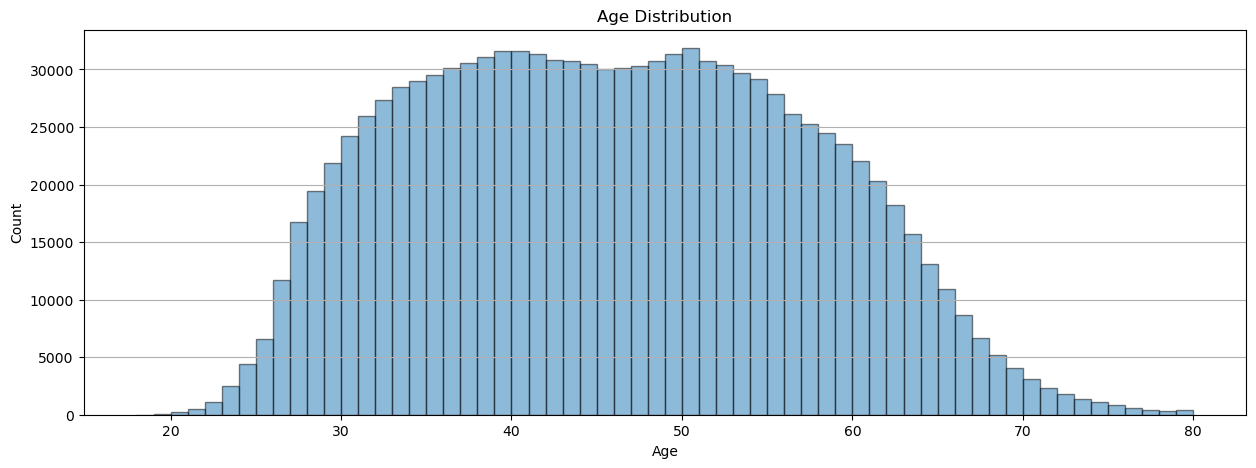

In [30]:
# plot - count by age
plt.figure(figsize=(15,5))
plt.hist(df["AGE"], bins=np.arange(df["AGE"].min(), df["AGE"].max()+1), 
         edgecolor='black', alpha=0.5)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

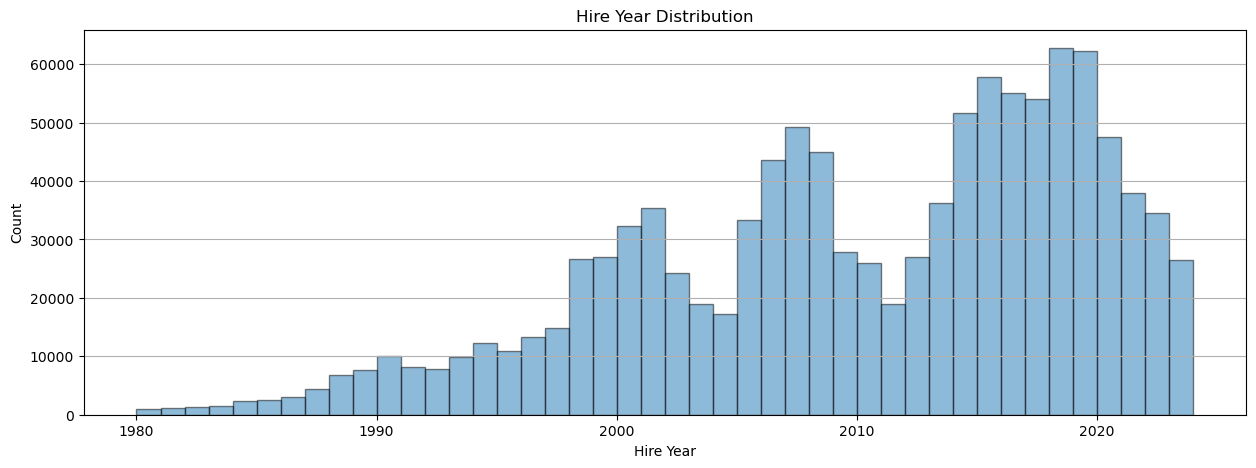

In [32]:
# plot - count by hire year
plt.figure(figsize=(15,5))
plt.hist(df["HIRE_YEAR"], bins=np.arange(df["HIRE_YEAR"].min(), df["HIRE_YEAR"].max()+1), 
         edgecolor='black', alpha=0.5)
plt.title("Hire Year Distribution")
plt.xlabel("Hire Year")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

<Axes: xlabel='AGE', ylabel='YEARS_WORKED'>

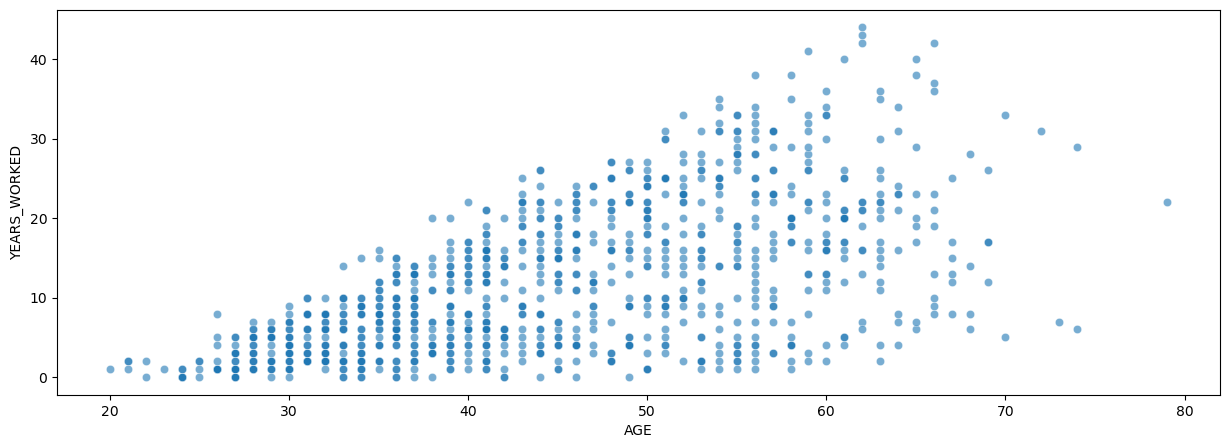

In [33]:
# plot - age by number of years worked
# sample of 1000
sample_df = df.sample(1000, random_state=6625)
plt.figure(figsize=(15, 5))
sns.scatterplot(x="AGE", y="YEARS_WORKED", data=sample_df, alpha=0.6)

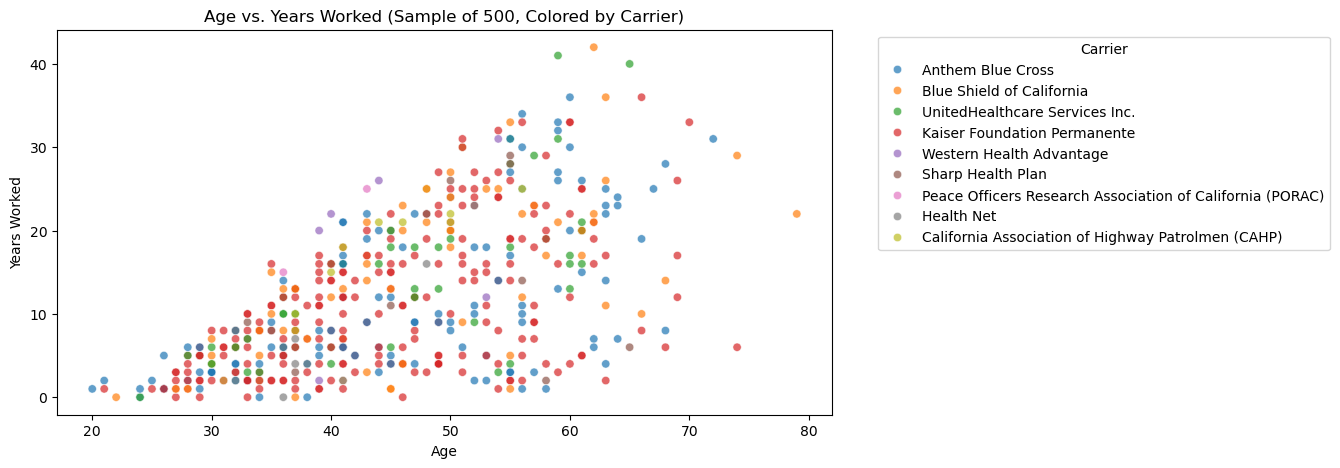

In [36]:
# plot - age by number of years worked, selection of carrier (health care)
# sample of 500
df_sample = df.sample(n=500, random_state=6625)

plt.figure(figsize=(10,5))
sns.scatterplot(
    data=df_sample,
    x="AGE",
    y="YEARS_WORKED",
    hue="CARRIER",
    alpha=0.7
)
plt.title("Age vs. Years Worked (Sample of 500, Colored by Carrier)")
plt.xlabel("Age")
plt.ylabel("Years Worked")
plt.legend(title="Carrier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

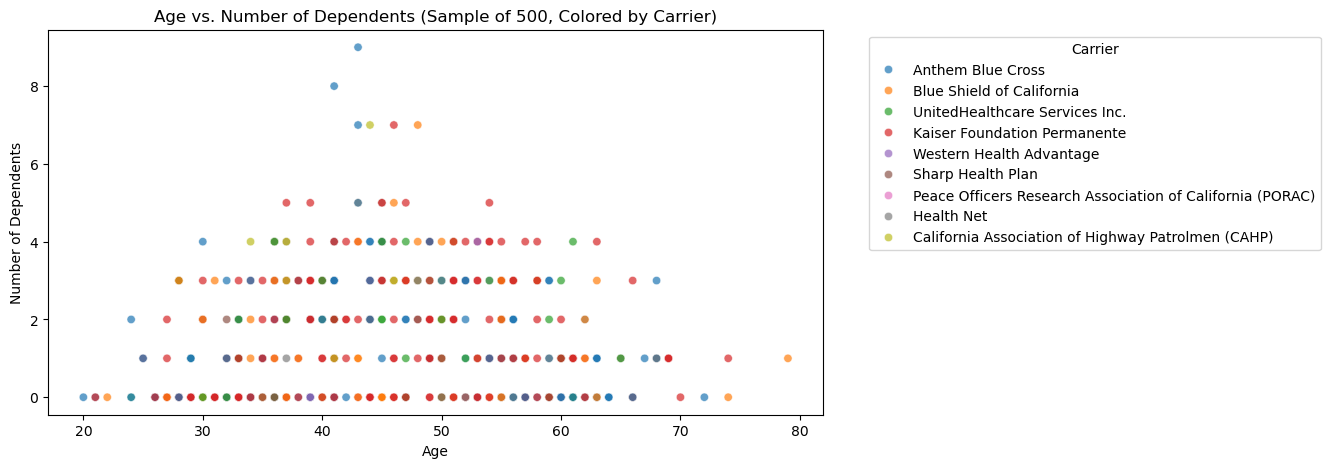

In [40]:
# plot - age by number of dependents, selection of carrier (health care)
# sample of 500
df_sample = df.sample(n=500, random_state=6625)

plt.figure(figsize=(10,5))
sns.scatterplot(
    data=df_sample,
    x="AGE",
    y="DEP_COUNT",
    hue="CARRIER",
    alpha=0.7
)
plt.title("Age vs. Number of Dependents (Sample of 500, Colored by Carrier)")
plt.xlabel("Age")
plt.ylabel("Number of Dependents")
plt.legend(title="Carrier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

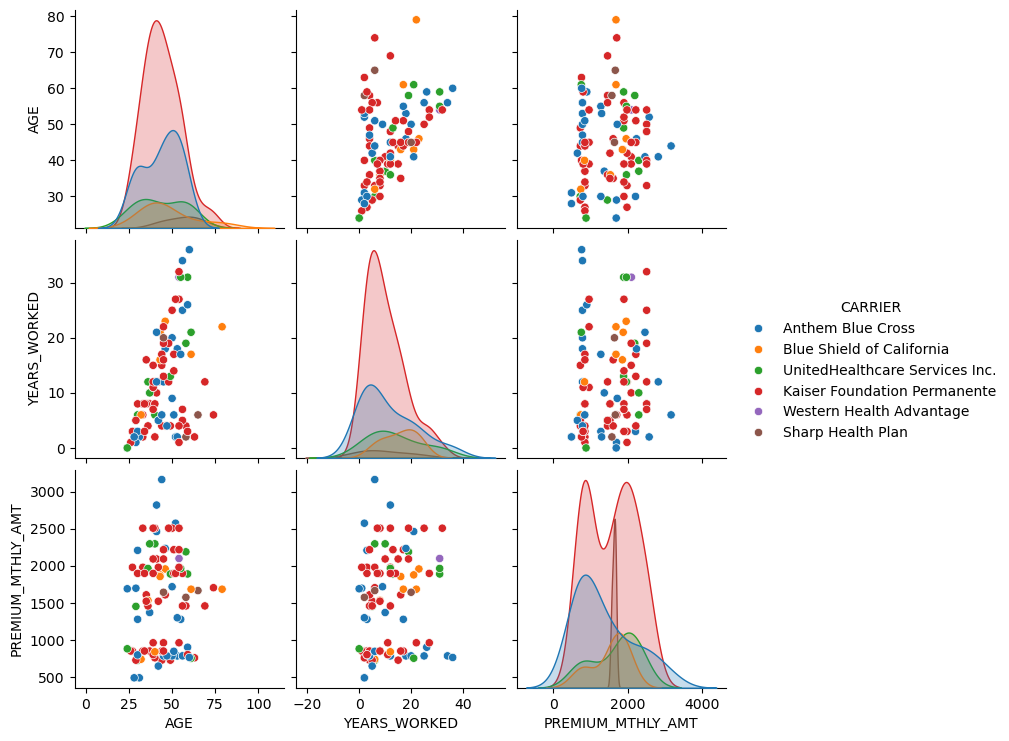

In [41]:
# plot - numerical data
# sample 100, for visual preference
subset = ["AGE", "YEARS_WORKED", "PREMIUM_MTHLY_AMT"]

sample_df = df.sample(100, random_state=6625)

sns.pairplot(sample_df[subset + ["CARRIER"]], hue="CARRIER", diag_kind="kde")
plt.show()

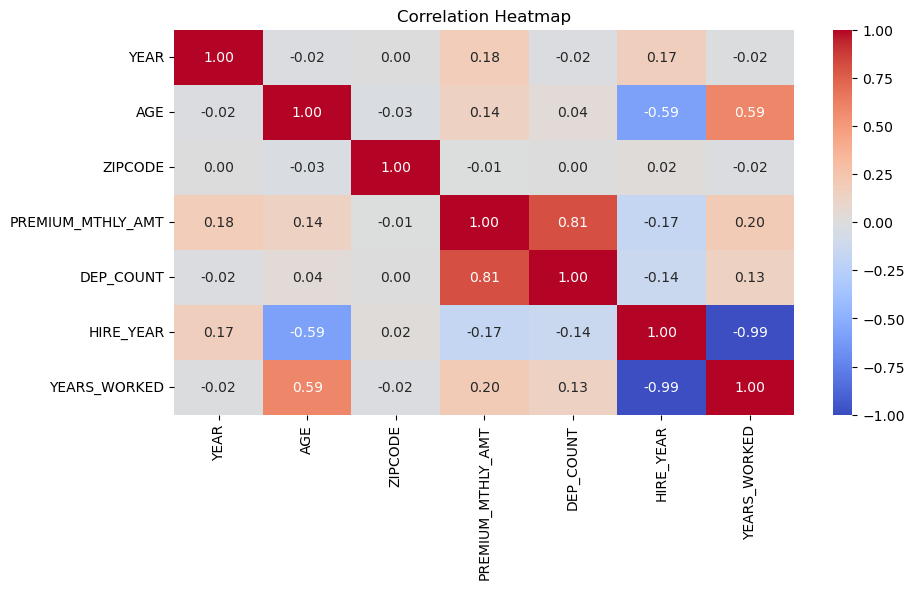

In [43]:
# plot correlation heatmap
df_numeric = df.select_dtypes(include=["float64", "int64", "int32"])
plt.figure(figsize=(10, 5))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [45]:
# * * * * * * * * * * * * * * * * * * * * * *
# 3. Preprocessing
# * * * * * * * * * * * * * * * * * * * * * *

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097024 entries, 0 to 1102059
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   YEAR                   1097024 non-null  int64  
 1   AGE                    1097024 non-null  int64  
 2   ZIPCODE                1097024 non-null  int64  
 3   CARRIER                1097024 non-null  object 
 4   LOV_HLTH_PLAN_TYPE_CD  1097024 non-null  object 
 5   LOV_HLTH_COV_TYPE_CD   1097024 non-null  object 
 6   PREMIUM_MTHLY_AMT      1097024 non-null  float64
 7   DEP_COUNT              1097024 non-null  int64  
 8   HIRE_YEAR              1097024 non-null  float64
 9   YEARS_WORKED           1097024 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 92.1+ MB


In [48]:
# One-hot encoding of categorical data
df = pd.get_dummies(df, columns=["LOV_HLTH_PLAN_TYPE_CD"],dtype=int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097024 entries, 0 to 1102059
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YEAR                       1097024 non-null  int64  
 1   AGE                        1097024 non-null  int64  
 2   ZIPCODE                    1097024 non-null  int64  
 3   CARRIER                    1097024 non-null  object 
 4   LOV_HLTH_COV_TYPE_CD       1097024 non-null  object 
 5   PREMIUM_MTHLY_AMT          1097024 non-null  float64
 6   DEP_COUNT                  1097024 non-null  int64  
 7   HIRE_YEAR                  1097024 non-null  float64
 8   YEARS_WORKED               1097024 non-null  float64
 9   LOV_HLTH_PLAN_TYPE_CD_ASC  1097024 non-null  int32  
 10  LOV_HLTH_PLAN_TYPE_CD_EPO  1097024 non-null  int32  
 11  LOV_HLTH_PLAN_TYPE_CD_HMO  1097024 non-null  int32  
 12  LOV_HLTH_PLAN_TYPE_CD_PPO  1097024 non-null  int32  
dtypes: float64(3), in

In [50]:
# round and convert to int to reduce memory and filesize
df["PREMIUM_MTHLY_AMT"] = df["PREMIUM_MTHLY_AMT"].round().astype("int32")

In [51]:
# drop LOV_HLTH_COV_TYPE_CD after encoding
df = df.drop(columns=["LOV_HLTH_COV_TYPE_CD"])

In [53]:
df["HIRE_YEAR"] = df["HIRE_YEAR"].astype("int32")
df["YEARS_WORKED"] = df["YEARS_WORKED"].astype("int32")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097024 entries, 0 to 1102059
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   YEAR                       1097024 non-null  int64 
 1   AGE                        1097024 non-null  int64 
 2   ZIPCODE                    1097024 non-null  int64 
 3   CARRIER                    1097024 non-null  object
 4   PREMIUM_MTHLY_AMT          1097024 non-null  int32 
 5   DEP_COUNT                  1097024 non-null  int64 
 6   HIRE_YEAR                  1097024 non-null  int32 
 7   YEARS_WORKED               1097024 non-null  int32 
 8   LOV_HLTH_PLAN_TYPE_CD_ASC  1097024 non-null  int32 
 9   LOV_HLTH_PLAN_TYPE_CD_EPO  1097024 non-null  int32 
 10  LOV_HLTH_PLAN_TYPE_CD_HMO  1097024 non-null  int32 
 11  LOV_HLTH_PLAN_TYPE_CD_PPO  1097024 non-null  int32 
dtypes: int32(7), int64(4), object(1)
memory usage: 79.5+ MB


In [55]:
df.head(10)

,YEAR,AGE,ZIPCODE,CARRIER,PREMIUM_MTHLY_AMT,DEP_COUNT,HIRE_YEAR,YEARS_WORKED,LOV_HLTH_PLAN_TYPE_CD_ASC,LOV_HLTH_PLAN_TYPE_CD_EPO,LOV_HLTH_PLAN_TYPE_CD_HMO,LOV_HLTH_PLAN_TYPE_CD_PPO
0,2020,56,96134,Anthem Blue Cross,1280,2,2000,20,0,0,0,1
1,2020,56,93637,Kaiser Foundation Permanente,1460,1,2002,18,0,0,1,0
2,2020,64,93636,Kaiser Foundation Permanente,1460,1,1988,32,0,0,1,0
3,2020,39,93638,Anthem Blue Cross,2046,4,2013,7,0,0,0,1
4,2020,30,93636,Anthem Blue Cross,1280,2,2016,4,0,0,0,1
5,2020,54,93637,Anthem Blue Cross,1280,2,2013,7,0,0,0,1
6,2020,24,93245,Anthem Blue Cross,787,0,2019,1,0,0,0,1
7,2020,60,93555,Anthem Blue Cross,492,0,2018,2,0,0,0,1
8,2020,53,95677,Kaiser Foundation Permanente,1460,1,1993,27,0,0,1,0
9,2020,38,95816,Anthem Blue Cross,2048,3,2006,14,0,0,1,0


In [56]:
# check for unbalanced data
carrier_pct = df["CARRIER"].value_counts(normalize=True) * 100
print(carrier_pct.round(2))
# I don't believe the data is very unbalanced.

CARRIER
Kaiser Foundation Permanente                                 46.71
Anthem Blue Cross                                            21.30
Blue Shield of California                                    14.48
UnitedHealthcare Services Inc.                                9.62
California Association of Highway Patrolmen (CAHP)            2.63
Sharp Health Plan                                             1.95
Health Net                                                    1.51
Western Health Advantage                                      1.41
Peace Officers Research Association of California (PORAC)     0.40
Name: proportion, dtype: float64


In [57]:
# * * * * * * * * * * * * * * * * * * * * * *
# 4. Feature Selection
# * * * * * * * * * * * * * * * * * * * * * *

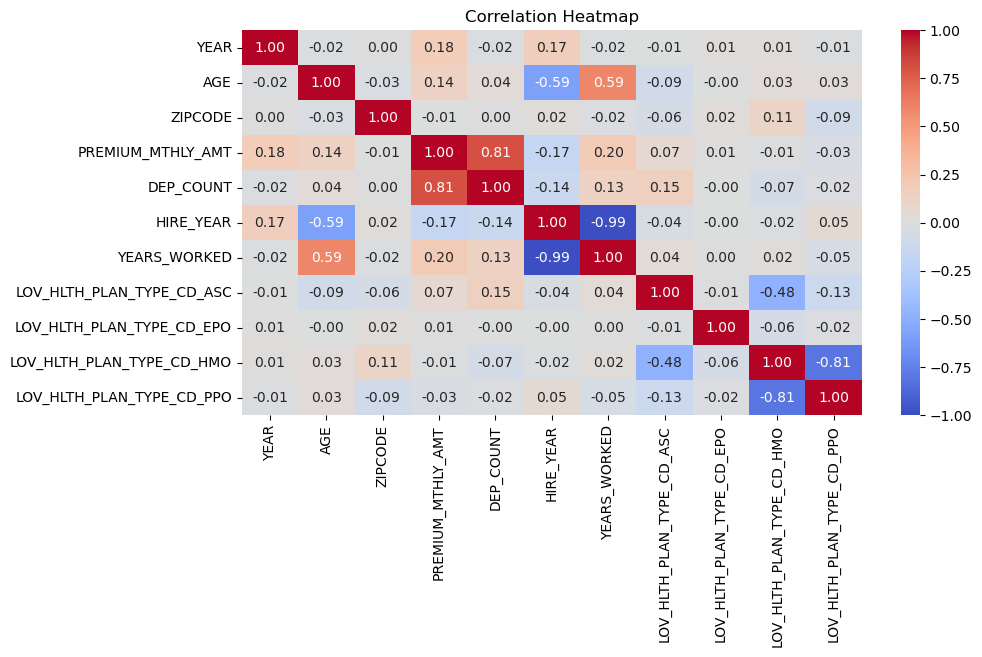

In [58]:
# plot correlation heatmap with one-hot encoded values
df_numeric = df.select_dtypes(include=["float64", "int64", "int32"])
plt.figure(figsize=(10, 5))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [59]:
# drop years worked, identified as redundant
df = df.drop(columns=["YEARS_WORKED"])

In [60]:
# drop zipcode
df = df.drop(columns=["ZIPCODE"])

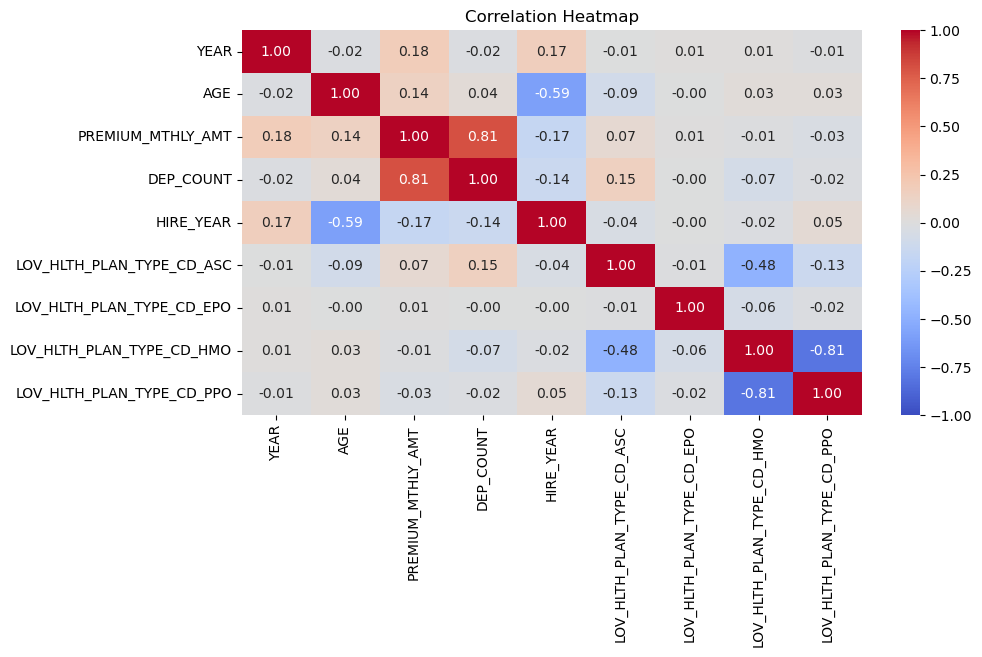

In [61]:
# plot correlation heatmap with one-hot encoded values
df_numeric = df.select_dtypes(include=["float64", "int64", "int32"])
plt.figure(figsize=(10, 5))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [62]:
# check for any data issues to reduce data type to int16
violations = (
    (df.select_dtypes(include=["int32", "int64"]) < -32768) |
    (df.select_dtypes(include=["int32", "int64"]) > 32767)
).any()

print(violations)

YEAR                         False
AGE                          False
PREMIUM_MTHLY_AMT            False
DEP_COUNT                    False
HIRE_YEAR                    False
LOV_HLTH_PLAN_TYPE_CD_ASC    False
LOV_HLTH_PLAN_TYPE_CD_EPO    False
LOV_HLTH_PLAN_TYPE_CD_HMO    False
LOV_HLTH_PLAN_TYPE_CD_PPO    False
dtype: bool


In [63]:
# change all columns to int16 for memory when running
for col in df.columns:
    if df[col].dtype in ["int64", "int32"]:
        df[col] = df[col].astype("int16")

In [65]:
df = df.sample(frac=1, random_state=6625).reset_index(drop=True)  # shuffle all rows
df = df.iloc[:400000]

In [66]:
df["YEAR"].value_counts()

YEAR
2024    81622
2023    80452
2020    79569
2021    79303
2022    79054
Name: count, dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   YEAR                       400000 non-null  int16 
 1   AGE                        400000 non-null  int16 
 2   CARRIER                    400000 non-null  object
 3   PREMIUM_MTHLY_AMT          400000 non-null  int16 
 4   DEP_COUNT                  400000 non-null  int16 
 5   HIRE_YEAR                  400000 non-null  int16 
 6   LOV_HLTH_PLAN_TYPE_CD_ASC  400000 non-null  int16 
 7   LOV_HLTH_PLAN_TYPE_CD_EPO  400000 non-null  int16 
 8   LOV_HLTH_PLAN_TYPE_CD_HMO  400000 non-null  int16 
 9   LOV_HLTH_PLAN_TYPE_CD_PPO  400000 non-null  int16 
dtypes: int16(9), object(1)
memory usage: 9.9+ MB


In [71]:
df.to_csv("data/final_data.csv", index=False)

In [72]:
# end